# 常用的文本分类方法都有哪些: 

## 1.传统方法：

### 1.1 预处理：

-基于字符串匹配的正向/逆向/双向最大匹：这是一种基于词典的中文分词，核心是首先建立统一的词典表，当需要对一个句子进行分词时，首先将句子拆分成多个部分，将每一个部分与字典一一对应，如果该词语在词典中，分词成功，否则继续拆分匹配直到成功。

-基于理解的句法和语义分析消: 它通常包括三个部分：分词子系统、句法语义子系统、总控部分。在总控部分的协调下，分词子系统可以获得有关词、句子等的句法和语义信息来对分词歧义进行判断，即它模拟了人对句子的理解过程。

-基于统计的互信息/CRF方法：即拆分句子，基于语料库，统计相邻的字组成的词语出现的概率，相邻的词出现的次数多，就出现的概率大，按照概率值进行分词，所以一个完整的语料库很重要。主要的统计模型有： N元文法模型（N-gram），隐马尔可夫模型（Hidden Markov Model ，HMM），最大熵模型（ME），条件随机场模型（Conditional Random Fields，CRF）等。

### 1.2 特征提取：
向量空间模型的文本表示方法的特征提取对应特征项的选择和特征权重计算两部分。特征选择的基本思路是根据某个评价指标独立的对原始特征项（词项）进行评分排序，从中选择得分最高的一些特征项，过滤掉其余的特征项。常用的评价有文档频率、互信息、信息增益、χ²统计量等。特征权重主要是经典的TF-IDF方法及其扩展方法，主要思路是一个词的重要度与在类别内的词频成正比，与所有类别出现的次数成反比。

### 1.3 文本表示
文本表示的目的是把文本预处理后的转换成计算机可理解的方式，是决定文本分类质量最重要的部分。传统做法常用词袋模型（BOW, Bag Of Words）或向量空间模型（Vector Space Model），最大的不足是忽略文本上下文关系，每个词之间彼此独立，并且无法表征语义信息。词袋模型的示例如下：( 0, 0, 0, 0, .... , 1, ... 0, 0, 0, 0)   一般来说词库量至少都是百万级别，因此词袋模型有个两个最大的问题：高纬度、高稀疏性。词袋模型是向量空间模型的基础，因此向量空间模型通过特征项选择降低维度，通过特征权重计算增加稠密性。

传统做法在文本表示方面除了向量空间模型，还有基于语义的文本表示方法，比如LDA主题模型、LSI/PLSI概率潜在语义索引等方法，一般认为这些方法得到的文本表示可以认为文档的深层表示，而word embedding文本分布式表示方法则是深度学习方法的重要基础。

### 1.4 机器学习分类器
将文本表示为模型可以处理的向量数据后，就可以使用机器学习模型来进行处理，常用的模型有：朴素贝叶斯，KNN方法，决策树，支持向量机，GBDT/XGBOOST

# 2.深度学习方法：
深度学习文本分类方法的模型有：

1）fastText

2）TextCNN

3）TextRNN

4）TextRNN + Attention

5）TextRCNN

引用：

1.https://zhuanlan.zhihu.com/p/76003775

2.https://www.cnblogs.com/sxron/articles/7742692.html

# RNN为什么会出现梯度消失

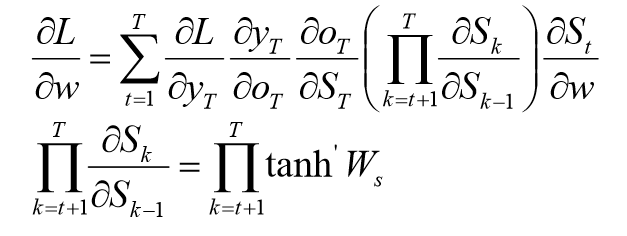

In [30]:
from IPython.display import Image
Image(filename="drive/My Drive/HCLG/lesson4/1.png")

因为有连乘那一项，所以随着时间的推移，那一项的梯度可能会很小，导致整个式子的梯度值很小。







In [0]:
# !pip install tensorflow_gpu==1.15
import torch
import sys
# mount google drive
!cp 'drive/My Drive/HCLG/lesson4/model.py' .
!cp 'drive/My Drive/HCLG/lesson4/cnews_loader.py' .
!cp 'drive/My Drive/HCLG/lesson4/data_batch.py' .
!cp 'drive/My Drive/HCLG/lesson4/test.py' .
!cp 'drive/My Drive/HCLG/lesson4/train_sampling.py' .
!cp 'drive/My Drive/HCLG/lesson4/cnews.train.txt' .
!cp 'drive/My Drive/HCLG/lesson4/cnews.test.txt' .
!cp 'drive/My Drive/HCLG/lesson4/cnews.val.txt' .
!cp 'drive/My Drive/HCLG/lesson4/cnews.vocab.txt' .
# !cp 'drive/My Drive/HCLG/lesson4/train_sampling.py' .
from torch import nn
from torch import optim
import torch.utils.data as Data
import numpy as np
from model import TextRNN
# process_file把文本截断
from cnews_loader import read_category, read_vocab, process_file

train_file = 'drive/My Drive/HCLG/lesson4/cnews.train.txt'
test_file = 'drive/My Drive/HCLG/lesson4/cnews.test.txt'
val_file = 'drive/My Drive/HCLG/lesson4/cnews.val.txt'
vocab_file = 'drive/My Drive/HCLG/lesson4/cnews.vocab.txt'

In [0]:
print(TextRNN())

TextRNN(
  (embedding): Embedding(5000, 64)
  (rnn): GRU(64, 128, bidirectional=True)
  (f1): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
  )
  (f2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
categories, cat_to_id = read_category()
print(categories)
words, word_to_id = read_vocab('cnews.vocab.txt')
# print(words)
vocab_size = len(words)

x_train, y_train = process_file('cnews.train.txt', word_to_id, cat_to_id, 600)
x_val, y_val = process_file('cnews.val.txt', word_to_id, cat_to_id, 600)

# 先把数据给转换成tensor类型
x_train, y_train = torch.LongTensor(x_train), torch.Tensor(y_train)
x_val, y_val = torch.LongTensor(x_val), torch.Tensor(y_val)

#定义分配
train_dataset = Data.TensorDataset(x_train, y_train)
train_loader = Data.DataLoader(dataset = train_dataset, batch_size = 100,
                               shuffle = True, num_workers = 2)
val_dataset = Data.TensorDataset(x_val, y_val)
val_loader = Data.DataLoader(dataset = val_dataset, batch_size = 100,
                               shuffle = True, num_workers = 2)

['体育', '财经', '房产', '家居', '教育', '科技', '时尚', '时政', '游戏', '娱乐']


In [0]:
def train():
    #用cuda开启GPU训练
    model = TextRNN().cuda()
    # 定义损失函数
    Loss = nn.MultiLabelSoftMarginLoss()
    optimizer = optim.Adam(model.parameters(), lr  = 0.001)
    best_val_acc = 0

    for epoch in range(1000):
        print('epoch=', epoch)
        for step, (x_batch, y_batch) in enumerate(train_loader):
            x = x_batch.cuda()
            y = y_batch.cuda()
            out = model(x)
            loss = Loss(out,y)
            # print('loss=', loss)
            # 反向传播第一步，清空数据
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # 计算准确率
            accuracy = np.mean((torch.argmax(out, 1) == torch.argmax(y, 1)).cpu().numpy())
            # print(accuracy)

            #对模型进行验证
            if epoch == 0:
                torch.save(model.state_dict(), 'drive/My Drive/HCLG/lesson4/model_2_params_epoch_'+str(epoch) +'.pkl')
            if (epoch+1)%5 == 0:
                for step, (x_batch, y_batch) in enumerate(val_loader):
                    x = x_batch.cuda()
                    y = y_batch.cuda()
                    out = model(x) 

                    # 计算准确率
                    accuracy = np.mean((torch.argmax(out, 1) == torch.argmax(y, 1)).cpu().numpy())
                    
                    if accuracy > best_val_acc:
                        torch.save(model.state_dict(), 'drive/My Drive/HCLG/lesson4/model_2_params_epoch_'+str(epoch) +'.pkl')
                        best_val_acc = accuracy
                        print(accuracy)
                        

In [0]:
train()

epoch= 0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch= 1
epoch= 2
epoch= 3
epoch= 4
0.36
0.47
0.5
0.53
0.54
0.55
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
0.56
0.6
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39
epoch= 40
epoch= 41
epoch= 42
epoch= 43
epoch= 44
epoch= 45
epoch= 46
epoch= 47
epoch= 48
epoch= 49
epoch= 50
epoch= 51
epoch= 52
epoch= 53
epoch= 54
epoch= 55
epoch= 56
epoch= 57
epoch= 58
epoch= 59
epoch= 60
epoch= 61
epoch= 62
epoch= 63
epoch= 64


KeyboardInterrupt: ignored

In [0]:
import tensorflow.contrib.keras as kr
import torch
from torch import nn
from cnews_loader import read_category, read_vocab
from model import TextRNN
import numpy as np

vocab_file = 'cnews.vocab.txt'

class RnnModel:
    def __init__(self):
        self.categories, self.cat_to_id = read_category()
        self.words, self.word_to_id = read_vocab(vocab_file)
        self.model = TextRNN()
        self.model.load_state_dict(torch.load('drive/My Drive/HCLG/lesson4/model_2_params_epoch_9.pkl'))
 
    def predict(self, message):
        content = message
        data = [self.word_to_id[x] for x in content if x in self.word_to_id]
        data = kr.preprocessing.sequence.pad_sequences([data], 600)
        data = torch.LongTensor(data)
        y_pred_cls = self.model(data)
        class_index = torch.argmax(y_pred_cls[0]).item()
        return self.categories[class_index]
 
 
# if __name__ == '__main__':
model_test = RnnModel()
test_demo = ['《时光重返四十二难》恶搞唐增取经一款时下最热门的动画人物：猪猪侠，加上创新的故事背景，震撼的操作快感，成就了这部恶搞新作，现正恶搞上市，玩家们抢先赶快体验快感吧。游戏简介：被时光隧道传送到208年的猪猪侠，必须经历六七四十二难的考验，才能借助柯伊诺尔大钻石的力量，开启时光隧道，重返2008年。在迷糊老师、菲菲公主的帮助下，猪猪侠接受了挑战，开始了这段充满了关心和情谊的旅程。    更多精彩震撼感觉，立即下载该款游戏尽情体验吧。玩家交流才是王道，讯易游戏玩家交流中心 QQ群：6306852-----------------生活要有激情，游戏要玩多彩(多彩游戏)。Colourfulgame (多彩游戏)，让你看看快乐游戏的颜色！精品推荐：1：《钟馗传》大战无头关羽，悲壮的剧情伴随各朝英灵反攻地府！2：《中华群英》将和赵云，项羽，岳飞等猛将作战，穿越各朝代抗击日寇。良品推荐：1：《赌王争霸之斗地主》易飞会在四角恋中会选择谁？是否最终成赌神呢？2：勇者后裔和魔王紧缠一起，前代恩怨《圣火伏魔录》将为您揭示一切。  3：颠覆传统概念，恶搞+非主流？！誓必弄死搞残为止《爆笑飞行棋》。4：《中国象棋残局大师》快棋和人机模式让畅快对弈！一切“多彩游戏”资讯，点击Colourfulgame官网http://www.colourfulgame.com一切“多彩游戏”感言，交流Colourfulgame论坛http://121.33.203.124/forum/【客服邮箱】：xunyiwangluo@126.com">xunyiwangluo@126.com">xunyiwangluo@126.com【客服热线】：020-87588437']

for i in test_demo:
    print(i)
    print('\n')
    print(model_test.predict(i))

《时光重返四十二难》恶搞唐增取经一款时下最热门的动画人物：猪猪侠，加上创新的故事背景，震撼的操作快感，成就了这部恶搞新作，现正恶搞上市，玩家们抢先赶快体验快感吧。游戏简介：被时光隧道传送到208年的猪猪侠，必须经历六七四十二难的考验，才能借助柯伊诺尔大钻石的力量，开启时光隧道，重返2008年。在迷糊老师、菲菲公主的帮助下，猪猪侠接受了挑战，开始了这段充满了关心和情谊的旅程。    更多精彩震撼感觉，立即下载该款游戏尽情体验吧。玩家交流才是王道，讯易游戏玩家交流中心 QQ群：6306852-----------------生活要有激情，游戏要玩多彩(多彩游戏)。Colourfulgame (多彩游戏)，让你看看快乐游戏的颜色！精品推荐：1：《钟馗传》大战无头关羽，悲壮的剧情伴随各朝英灵反攻地府！2：《中华群英》将和赵云，项羽，岳飞等猛将作战，穿越各朝代抗击日寇。良品推荐：1：《赌王争霸之斗地主》易飞会在四角恋中会选择谁？是否最终成赌神呢？2：勇者后裔和魔王紧缠一起，前代恩怨《圣火伏魔录》将为您揭示一切。  3：颠覆传统概念，恶搞+非主流？！誓必弄死搞残为止《爆笑飞行棋》。4：《中国象棋残局大师》快棋和人机模式让畅快对弈！一切“多彩游戏”资讯，点击Colourfulgame官网http://www.colourfulgame.com一切“多彩游戏”感言，交流Colourfulgame论坛http://121.33.203.124/forum/【客服邮箱】：xunyiwangluo@126.com">xunyiwangluo@126.com">xunyiwangluo@126.com【客服热线】：020-87588437


游戏


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


可以再修改一下模型的超参数，使得训练的accuracy更高一点。不过即使是0.6， 也可以把上面关于游戏的文字给正确分类出来